In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(suppress = True)

C:\Users\wodnj\AppData\Local\Temp\ipykernel_7184\3335876068.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
import sklearn
sklearn.__version__

'1.4.1.post1'

Heart Disease data from uci ml website  
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [4]:
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
             'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', 
                 header = None, names = col_names)
df.head()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [7]:
df.shape

(303, 14)

## Preprocess data

In [8]:
df.num.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [9]:
df.num.value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [10]:
df['num'] = np.where(df.num == 0, 0, 1)

In [11]:
df.num.unique()

array([0, 1])

In [12]:
df.num.value_counts()

num
0    164
1    139
Name: count, dtype: int64

In [13]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [ ]:
df['thal'].unique()

In [14]:
df.replace('?', np.nan, inplace = True)

In [15]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [16]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', nan], dtype=object)

In [17]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', nan], dtype=object)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    object 
 12  thal      301 non-null    object 
 13  num       303 non-null    int32  
dtypes: float64(11), int32(1), object(2)
memory usage: 32.1+ KB


In [19]:
df['ca'] = df.ca.astype(float)
df['thal'] = df.thal.astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int32  
dtypes: float64(13), int32(1)
memory usage: 32.1 KB


In [21]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

## Visualize

In [22]:
df_small = df[['age', 'cp', 'chol', 'num']]

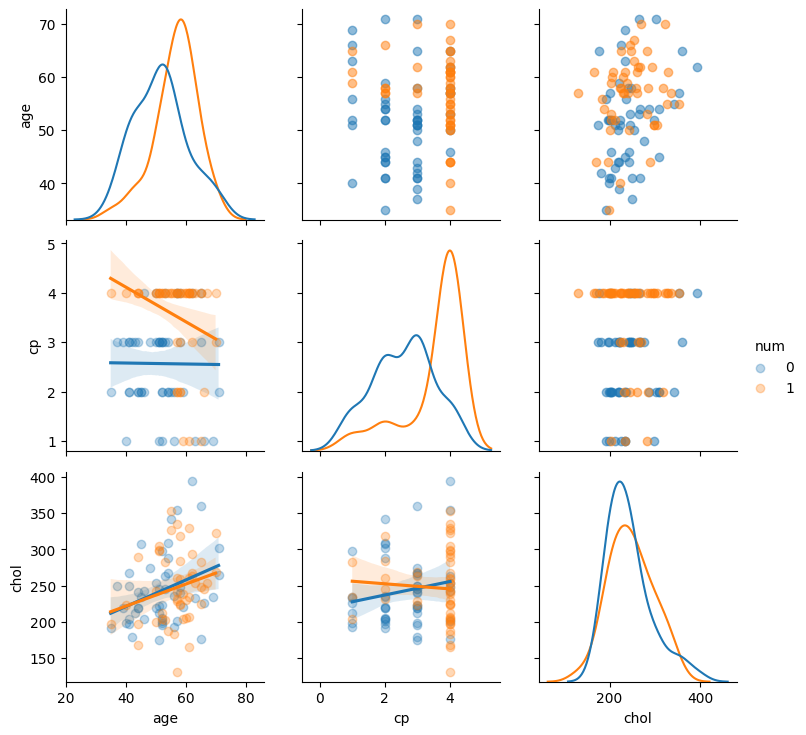

In [23]:
g=sns.PairGrid(data = df_small.sample(100), diag_sharey = False, hue = 'num')
g.map_diag(sns.kdeplot)
g.map_upper(plt.scatter, alpha = 0.5)
g.map_lower(sns.regplot,fit_reg = True, scatter_kws = {'alpha':0.3})

g.add_legend()

## Train-Test split

In [24]:
X = df.drop('num', axis = 1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


In [25]:
y = df.num
y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: num, Length: 303, dtype: int32

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20, stratify = y)

In [27]:
y_train.value_counts(normalize = True)

num
0    0.541322
1    0.458678
Name: proportion, dtype: float64

In [28]:
y_test.value_counts(normalize = True)

num
0    0.540984
1    0.459016
Name: proportion, dtype: float64

## Imputing NaN

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
imputer = SimpleImputer(strategy = 'most_frequent')

In [32]:
imputer.fit(X_train)

SimpleImputer(strategy='most_frequent')

In [33]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [35]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    float64
 1   sex       242 non-null    float64
 2   cp        242 non-null    float64
 3   trestbps  242 non-null    float64
 4   chol      242 non-null    float64
 5   fbs       242 non-null    float64
 6   restecg   242 non-null    float64
 7   thalach   242 non-null    float64
 8   exang     242 non-null    float64
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    float64
 11  ca        242 non-null    float64
 12  thal      242 non-null    float64
dtypes: float64(13)
memory usage: 24.7 KB


In [36]:
X_test = pd.DataFrame(X_test, columns = X.columns)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       61 non-null     float64
 1   sex       61 non-null     float64
 2   cp        61 non-null     float64
 3   trestbps  61 non-null     float64
 4   chol      61 non-null     float64
 5   fbs       61 non-null     float64
 6   restecg   61 non-null     float64
 7   thalach   61 non-null     float64
 8   exang     61 non-null     float64
 9   oldpeak   61 non-null     float64
 10  slope     61 non-null     float64
 11  ca        61 non-null     float64
 12  thal      61 non-null     float64
dtypes: float64(13)
memory usage: 6.3 KB


## One Hot Encoding

### 1. Dummy encoding using Pandas

In [38]:
X_train_dummy  = X_train.copy()
X_test_dummy = X_test.copy()

X_train_dummy['train_test'] = 'train'
X_test_dummy['train_test'] = 'test'

In [39]:
X_combi = pd.concat([X_train_dummy, X_test_dummy], axis = 0)

In [40]:
X_combi = pd.get_dummies(data = X_combi, columns = ['cp', 'restecg', 'slope', 'thal'])

In [41]:
X_combi.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,train_test,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,37.0,0.0,120.0,215.0,0.0,170.0,0.0,0.0,0.0,train,...,False,True,False,False,True,False,False,True,False,False
1,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,train,...,True,True,False,False,False,True,False,False,False,True
2,69.0,1.0,160.0,234.0,1.0,131.0,0.0,0.1,1.0,train,...,False,False,False,True,False,True,False,True,False,False
3,43.0,1.0,120.0,177.0,0.0,120.0,1.0,2.5,0.0,train,...,True,False,False,True,False,True,False,False,False,True
4,58.0,0.0,130.0,197.0,0.0,131.0,0.0,0.6,0.0,train,...,True,True,False,False,False,True,False,True,False,False


In [42]:
X_train_dummy = X_combi.loc[X_combi['train_test'] == 'train', :]
X_test_dummy = X_combi.loc[X_combi['train_test'] == 'test', :]

X_train_dummy = X_train_dummy.drop('train_test', axis = 1)
X_test_dummy = X_test_dummy.drop('train_test', axis = 1)

In [43]:
X_train_dummy.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_0.0',
       'restecg_1.0', 'restecg_2.0', 'slope_1.0', 'slope_2.0', 'slope_3.0',
       'thal_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')

### 2. Onehot encoding using variable names in sklearn

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer

In [45]:
ohe = OneHotEncoder()

In [46]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [47]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [48]:
ct = ColumnTransformer(
    transformers=[('ohe', ohe, ['cp', 'restecg', 'slope', 'thal'])], 
    remainder="passthrough")

In [49]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,37.0,0.0,3.0,120.0,215.0,0.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0
1,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
2,69.0,1.0,1.0,160.0,234.0,1.0,2.0,131.0,0.0,0.1,2.0,1.0,3.0
3,43.0,1.0,4.0,120.0,177.0,0.0,2.0,120.0,1.0,2.5,2.0,0.0,7.0
4,58.0,0.0,4.0,130.0,197.0,0.0,0.0,131.0,0.0,0.6,2.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0
238,56.0,1.0,1.0,120.0,193.0,0.0,2.0,162.0,0.0,1.9,2.0,0.0,7.0
239,44.0,1.0,4.0,112.0,290.0,0.0,2.0,153.0,0.0,0.0,1.0,1.0,3.0
240,59.0,1.0,2.0,140.0,221.0,0.0,0.0,164.0,1.0,0.0,1.0,0.0,3.0


In [50]:
ct.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe', OneHotEncoder(),
                                 ['cp', 'restecg', 'slope', 'thal'])])

In [51]:
ct.transform(X_train).shape

(242, 22)

In [53]:
X_train2 = ct.transform(X_train)
X_test2 = ct.transform(X_test)

In [52]:
ct.get_feature_names_out()

array(['ohe__cp_1.0', 'ohe__cp_2.0', 'ohe__cp_3.0', 'ohe__cp_4.0',
       'ohe__restecg_0.0', 'ohe__restecg_1.0', 'ohe__restecg_2.0',
       'ohe__slope_1.0', 'ohe__slope_2.0', 'ohe__slope_3.0',
       'ohe__thal_3.0', 'ohe__thal_6.0', 'ohe__thal_7.0',
       'remainder__age', 'remainder__sex', 'remainder__trestbps',
       'remainder__chol', 'remainder__fbs', 'remainder__thalach',
       'remainder__exang', 'remainder__oldpeak', 'remainder__ca'],
      dtype=object)

In [54]:
X_train2.shape

(242, 22)

In [55]:
X_test2.shape

(61, 22)

## Diagnosing bias and variance problems - Logistic Regression

### Optimize the C value

In [56]:
C_vals = [0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 1, 2, 5, 10, 15, 20, 50, 100, 1000, 10000, 100000]
C_vals

[0.0001,
 0.001,
 0.01,
 0.03,
 0.1,
 0.3,
 1,
 2,
 5,
 10,
 15,
 20,
 50,
 100,
 1000,
 10000,
 100000]

#### Create Train - Validation Set

In [57]:
X_train, X_val, y_train, y_val = train_test_split(X_train2, y_train, test_size = 0.20, random_state = 20)

### Validation Curve

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

scores_tr = []
scores_val = []

for C in C_vals:
    clf = LogisticRegression(C = C, max_iter = 2000)
    clf.fit(X_train, y_train)

    pred = clf.predict(X_train)
    scores_tr.append(metrics.accuracy_score(y_train, pred))
    
    pred = clf.predict(X_val)
    scores_val.append(metrics.accuracy_score(y_val, pred))

In [61]:
scores_tr

[0.689119170984456,
 0.6994818652849741,
 0.7875647668393783,
 0.8186528497409327,
 0.8549222797927462,
 0.8704663212435233,
 0.8756476683937824,
 0.8704663212435233,
 0.8704663212435233,
 0.8704663212435233,
 0.8704663212435233,
 0.8704663212435233,
 0.8704663212435233,
 0.8704663212435233,
 0.8704663212435233,
 0.8704663212435233,
 0.8756476683937824]

In [62]:
scores_val

[0.6326530612244898,
 0.6938775510204082,
 0.7346938775510204,
 0.7551020408163265,
 0.7755102040816326,
 0.7755102040816326,
 0.7755102040816326,
 0.7755102040816326,
 0.7755102040816326,
 0.7755102040816326,
 0.7755102040816326,
 0.7755102040816326,
 0.7755102040816326,
 0.7755102040816326,
 0.7755102040816326,
 0.7755102040816326,
 0.7755102040816326]

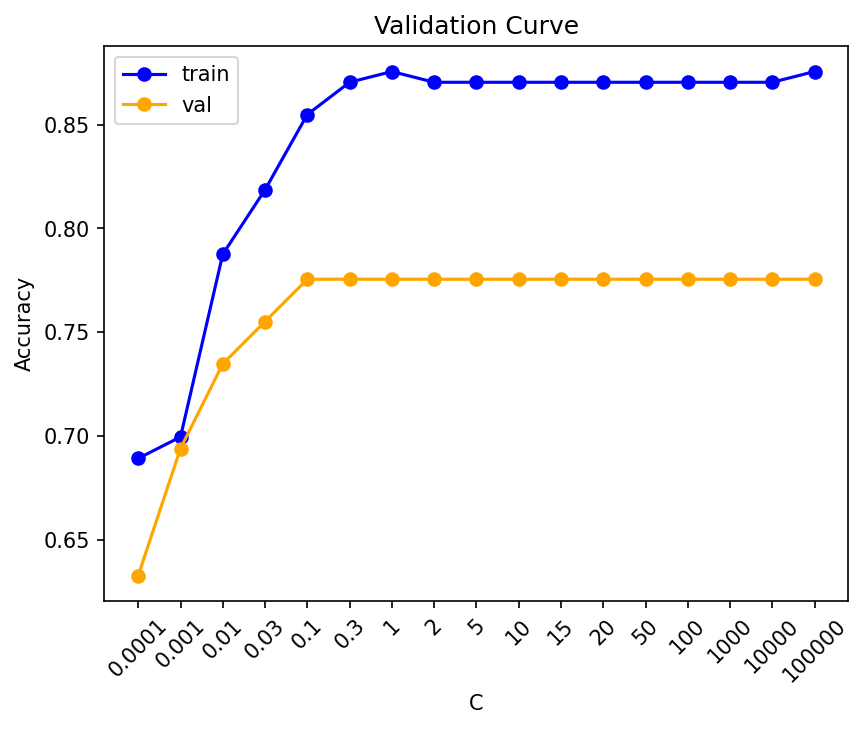

In [63]:
f, ax = plt.subplots(dpi = 150)
plt.plot(scores_tr, marker = 'o', color = 'blue', label = 'train')
plt.plot(scores_val, color = 'orange', marker = 'o', label = 'val')
plt.title('Validation Curve')
plt.xticks(ticks = np.arange(len(C_vals)), labels = C_vals, rotation = 45)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Learning Curve

In [64]:
accuracy_train = []
accuracy_val = []
clf = LogisticRegression(max_iter = 1000, C = 1, verbose = 0)

num_points = list(range(5, X_train.shape[0], 10))

for n in num_points:
    clf.fit(X_train[0:n, :], y_train[0:n])
    pred_trn = clf.predict(X_train[0:n, :])
    accuracy_train.append(metrics.accuracy_score(y_true = y_train[0:n], y_pred = pred_trn))
    pred_val = clf.predict(X_val)
    accuracy_val.append(metrics.accuracy_score(y_true = y_val, y_pred = pred_val))

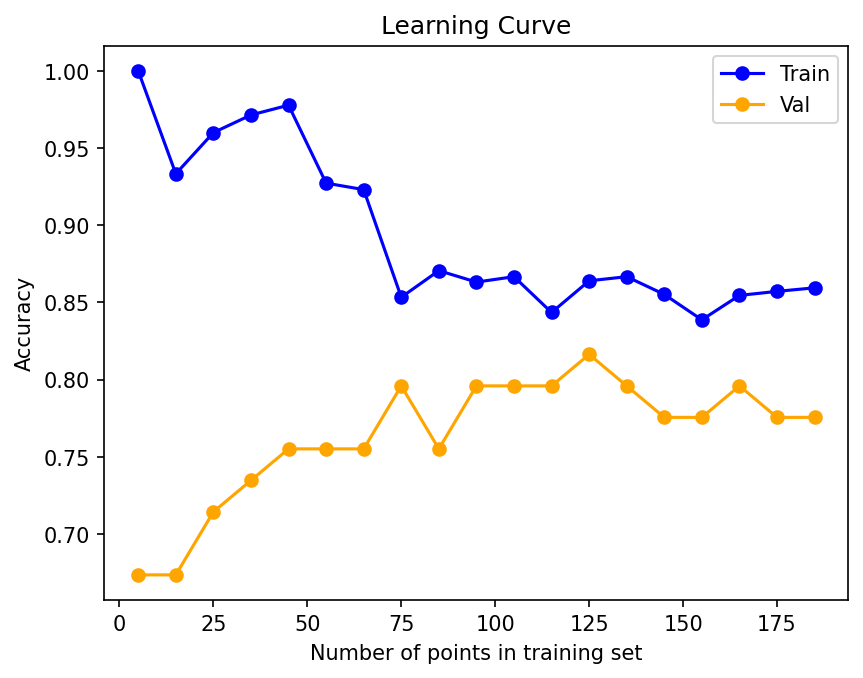

In [65]:
f, ax = plt.subplots(dpi = 150)
ax.plot(num_points, accuracy_train, marker = 'o', color = 'blue', label = 'Train')
ax.plot(num_points, accuracy_val, marker = 'o', color = 'orange', label = 'Val')
ax.set_xlabel('Number of points in training set')
ax.set_ylabel('Accuracy')
ax.set_title("Learning Curve")
ax.legend();

In [66]:
# decreasing the interval length for smoother curves
accuracy_train = []
accuracy_val = []
clf = LogisticRegression(max_iter = 1000, solver = 'lbfgs', penalty = 'l2', C = 1, verbose = 0)

num_points = list(range(5, X_train.shape[0], 5))

for n in num_points:
    clf.fit(X_train[0:n, :], y_train[0:n])
    pred_trn = clf.predict(X_train[0:n, :])
    accuracy_train.append(metrics.accuracy_score(y_true = y_train[0:n], y_pred = pred_trn))
    pred_val = clf.predict(X_val)
    accuracy_val.append(metrics.accuracy_score(y_true = y_val, y_pred = pred_val))

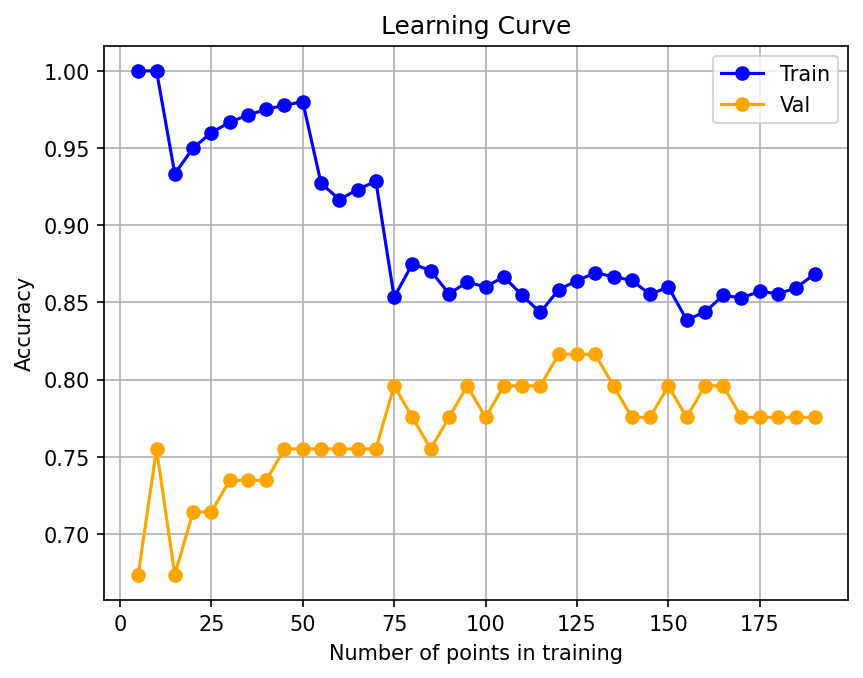

In [67]:
f, ax = plt.subplots(dpi = 150)
ax.plot(num_points, accuracy_train, marker = 'o', color = 'blue', label = 'Train')
ax.plot(num_points, accuracy_val, marker = 'o', color = 'orange', label = 'Val')
ax.set_xlabel('Number of points in training')
ax.set_ylabel('Accuracy')
ax.set_title("Learning Curve")
ax.legend();
ax.grid()

## Diagnosing bias and variance problems - Support Vector Machine

### Validation Curve

In [68]:
from sklearn import svm
from sklearn import metrics

scores_tr2 = []
scores_val2 = []

for C in C_vals:
    clf2 = svm.SVC(C = C, max_iter = 2000)
    clf2.fit(X_train, y_train)

    pred = clf2.predict(X_train)
    scores_tr2.append(metrics.accuracy_score(y_train, pred))
    
    pred = clf2.predict(X_val)
    scores_val2.append(metrics.accuracy_score(y_val, pred))

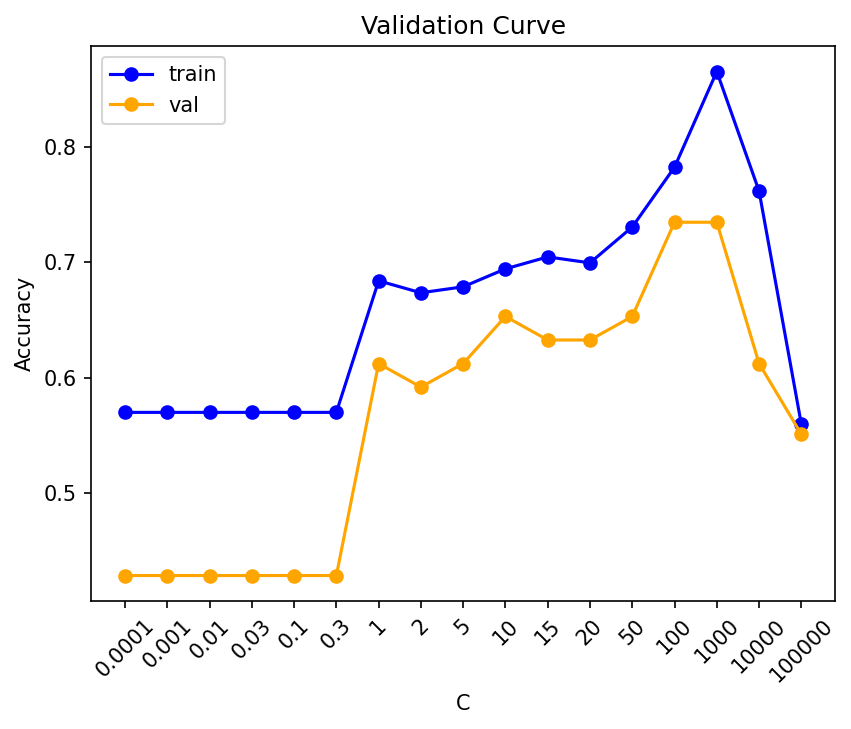

In [69]:
f, ax = plt.subplots(dpi = 150)
plt.plot(scores_tr2, marker = 'o', color = 'blue', label = 'train')
plt.plot(scores_val2, color = 'orange', marker = 'o', label = 'val')
plt.title('Validation Curve')
plt.xticks(ticks = np.arange(len(C_vals)), labels = C_vals, rotation = 45)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Learning Curve

In [72]:
accuracy_train2 = []
accuracy_val2 = []
clf2 = svm.SVC(max_iter = 1000, C = 10, verbose = 0)

num_points = list(range(5, X_train.shape[0], 5))

for n in num_points:
    clf2.fit(X_train[0:n, :], y_train[0:n])
    pred_trn = clf2.predict(X_train[0:n, :])
    accuracy_train2.append(metrics.accuracy_score(y_true = y_train[0:n], y_pred = pred_trn))
    pred_val = clf2.predict(X_val)
    accuracy_val2.append(metrics.accuracy_score(y_true = y_val, y_pred = pred_val))

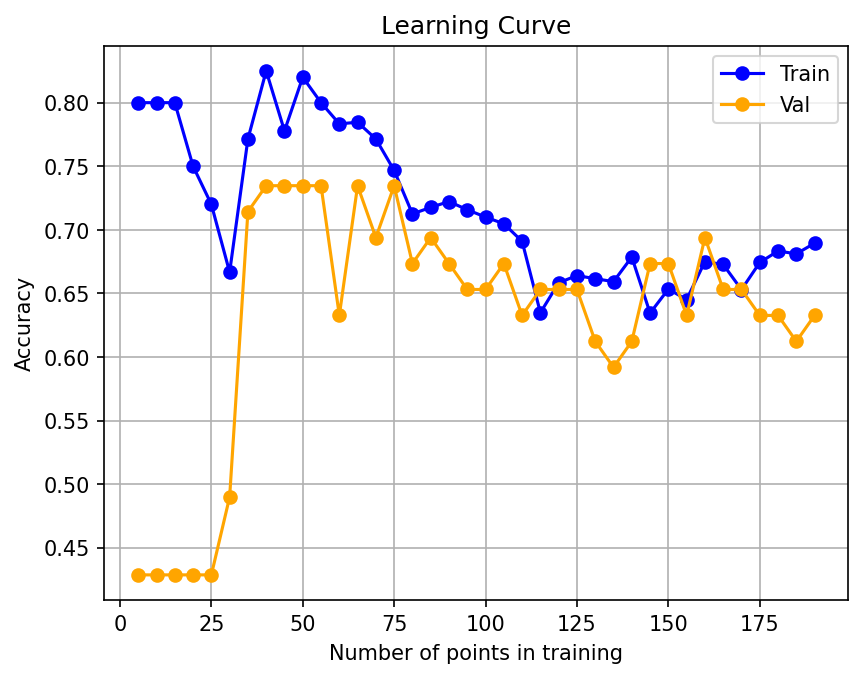

In [73]:
f, ax = plt.subplots(dpi = 150)
ax.plot(num_points, accuracy_train2, marker = 'o', color = 'blue', label = 'Train')
ax.plot(num_points, accuracy_val2, marker = 'o', color = 'orange', label = 'Val')
ax.set_xlabel('Number of points in training')
ax.set_ylabel('Accuracy')
ax.set_title("Learning Curve")
ax.legend();
ax.grid()